### Exercise 2 and 3


In exercise 2 I collaborated with: Adriana, Kara, Collin.

In exercise 3 I collaborated with Marius and Adriana.

In [ ]:
import numpy as np
import scipy.linalg as linalg
from numpy.linalg import norm as norm
import matplotlib.pyplot as plt
import numpy as np
import sys


In [ ]:
############################
# THE BINARY MULTIPLICATION CODE HAS BEEN GIVEN BY CHRIS IN THE AM205 FILES FOLDER
############################

import numpy as np
import sys

# This code provides an example of doing arithmetic on the binary set {0,1}. It
# takes advantage of the fact that the binary "+" and "*" operations are
# equivalent to the bitwise logic operators, which are built into Python. If
# you are unfamilar with bitwise operators, see the following page for more
# information:
#
# http://en.wikipedia.org/wiki/Bitwise_operation
#
# Binary addition is equivalent to the "exclusive or" or "XOR" operation, which
# is denoted by the "^" operator in Python. Hence, whenever we see a "+" or a
# "-", we replace it with a "^".
#
# Binary multiplication is equivalent to the "AND" operation, which is denoted
# by the "&" operator in Python. Hence, whenever we see a "*" we replace it
# with a "&".
#
# The following example code implements matrix multiplication on the binary
# set, using the above substitutions. In addition, since the bitwise operators
# only work on integers, each matrix is initialized to be integers using the
# option "dtype=np.int8".
#
# This code does not have any examples of division. However, implementing "x/y"
# can be done in the following way:
#   - if y==1 then x/y evaluates to x,
#   - if y==0 then an error is given.

# Function to calculate binary matrix multiplication
def bin_mul(c,d):
    
    # Check that the dimensions of the matrices are compatible
    (m,n)=c.shape
    (nn,p)=d.shape
    #print(m,n)
    #print(nn,p)
    if n!=nn:
        print("Matrix size mismatch")
        sys.exit()

    # Initalize blank matrix of integer zeros
    e=np.zeros((m,p),dtype=np.int8)
   # print(e)

    # Calculate each term, using "&" instead of "*" and "^" instead of "+"
    for i in range(m):
        for j in range(p):
            for k in range(n):
                e[i,j]= e[i,j]^(c[i,k]&d[k,j])
                #print(e[i,j])
    return e



In [ ]:
# These are the L and U matrix given in the exercise 2
l=np.array([[1,0,0,0],[0,1,0,0],[1,1,1,0],[1,0,1,1]],dtype=np.int8)
u=np.array([[1,0,1,0],[0,1,1,1],[0,0,1,0],[0,0,0,1]],dtype=np.int8)

# Carry out binary matrix multiplication and print the result
a=bin_mul(l,u)
print("This should result in the A given from the exercise:")
print(a)

This should result in the A given from the exercise:
[[1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 0 1]]


## Exercise 2




#### Explanation of rank and nullspaces

If a given matrix A is singular, it means that it does not have full rank. This means that the some columns of this matrix are a linear combination of another column. In case the matrix A doesn't have full rank, it can't be inverted. 

The rank of a matrix is given by the amount of columns that are linearly idependdent from each other. If a matrix has full rank, that matrix is non-singular. In case no column is a linear combination of any other column, then it means that our matrix has full rank and it can be inverted.

A way to check if a matrix is singular (not full rank), or non-singular (full rank), can be to check if the L matrix (coming from the LU factorization), has any 0 in its diagonal. In case there is one 0, it means that a column is a linear combination from another. This means that the rank of A is n-1 (where n is the number of columns). In case there are two 0s in the diagonal of L, it means that the rank of A will be n-2. And so on. These 'missing' linear independent columns that are needed to achieve full rank can be considered as an amount called "nullspaces". In case a matrix A has rank n-2, it means that it has 2 nullspaces. On the other hand, a matrix A with full rank, will have 0 nullspaces.



In [ ]:
#Problem 2a: Forward

L=np.array([[1,0,0,0],[0,1,0,0],[1,1,1,0],[1,0,1,1]],dtype=np.int8)
U=np.array([[1,0,1,0],[0,1,1,1],[0,0,1,0],[0,0,0,1]],dtype=np.int8)
A = np.array([[1,0,1,0],[0,1,1,1],[1,1,1,1],[1,0,0,1]],dtype=np.int8)


In exercise 2a we are given a matrix L. In this exercise we take into consideration the linear system:  

                            Lx=b.
                            
Here we want to find the solution x to this linear system. We want to use the forward substitution algorithm in the slide 38 of the Unit 2. 

Given that the matrix A at hand is a binary matrix, multiplications will be performed with the bitwise multiplication operator "&", and substractions and additions are performed with the bitwise addition operator "^".


#### How I am checking for singularity here in exercise 2
Additionally, I also check if the matrix A is singular by looking for 0s in the diagonal. In case theere is a 0 in the diagonal of L, it means that the multiplciation of the diagonal of L will be 0. If that is the case, I return an error "Matrix is singular".

In [ ]:

# Ax = b or LUx = b
# need b in order to calculate x 

# HAVE TO HARDCODE  the triangular matrix
# i row j column, a = L 
# x & y Does a "bitwise and". Each bit of the output is 1 if the corresponding bit of x AND of y is 1, otherwise it's 0.
# 1 x 1 = 1 & 1
# 1 + 1 = 1 ^ 1



##########FORWARD SUBSTITUTION
def fsolve(L,b):
    (m,n) = L.shape
    
    if L.diagonal().prod() == 0:
        raise ValueError("Matrix is singular") #if there is a 0 on the diagonal
    else: 
        # HERE I FOLLOW THE ALGORITHM IN SLIDE 38
        x = np.zeros((m,1),dtype=np.int8) #Creatina a column vector x with 0s
        x[0] = b[0]/L[0,0]
        
        for j in range(1,m):
            sum_k = 0
            for k in range(n):
                # SUMMING FROM k=1 to j-1
                sum_k = sum_k ^ (L[j][k] & x[k])
            # xi (building a b vector) = b[0,0] + (L[0,0]) * x[0])
     
            x[j] = (b[j] ^ sum_k)/L[j][j]  # Need to divide xi by the diagonal position 
    return x

In [ ]:
b = np.array([[1,1,0,0]]).T
x = fsolve(L,b)
x


array([[1],
       [1],
       [0],
       [1]], dtype=int8)

In [ ]:
#b = np.array([[1,1,0,1]]).T
bin_mul(L,b)
x

array([[1],
       [1],
       [0],
       [1]], dtype=int8)

In [ ]:
#b = np.array([[1,1,0,1]]).T
bin_mul(L,b) == fsolve(L,b)


array([[ True],
       [ True],
       [ True],
       [ True]])

My forward subtitution matches the binary multiplicatiion solution from the code of Chris. Hence, the forward subtitution code is ok.

## 2b


In exercise 2b we are given a matrix U. In this exercise we take into consideration the linear system:  

                            Ux=b.
                            
Here we want to find the solution x to this linear system. We want to use the backward substitution algorithm in the slide 37 of the Unit 2. 

Also here we check if A is singular by looking for 0s in the diagonal of U. if the product of the diagonal is 0, there is a 0 in the diagonal, hence the matrix will be singular, i.e. not full rank, i.e. not invertible.

In [ ]:
# Problem 2b: Backward
 
def rsolve(U,b):
    (m,n) = U.shape
    # HERE IS CHECK FOR SINGULARITY
    if U.diagonal().prod() == 0:
        raise ValueError("Matrix is singular")
    else:
        # HERE I USE THE ALGORITH IN SLIDE 37 
        x = np.zeros((m,1),dtype=np.int8)
        # HERE THE RANGE GOES FROM THE BOTTOM TO THE TOP, BECAUSE U IS THE
        # MATRIX WHERE THE LOWER TRIANGULAR HAS ALL THE 0S AND THE 1 IS AT THE LAST
        # ROW AND LAST COLUMN
        for j in range(m-1, -1 ,-1):
            sum_k = 0
            for k in range(j+1,n):
                sum_k = sum_k^(U[j][k] & x[k])
            x[j] = (b[j] ^ sum_k)/U[j][j]                                                                                                                                                                                                             
    return x

In [ ]:
b = np.array([[1],[0],[1],[1]])
x = rsolve(U,b)
x

array([[0],
       [0],
       [1],
       [1]], dtype=int8)

In [ ]:
b = np.array([[1],[0],[1],[1]])
bin_mul(U,b)
x

array([[0],
       [0],
       [1],
       [1]], dtype=int8)

My backward subtitution matches the binary multiplicatiion solution from the code of Chris. Hence, the backward subtitution code is ok.

In [ ]:
rsolve(U,b) == bin_mul(U,b)

array([[ True],
       [ True],
       [ True],
       [ True]])

## 2c

In [ ]:
# Problem 2c: Partial Pivoting
# HAVE TO HARD CODE
# USING THE PARTIAL PIVOTING CODE FROM SLIDE 70

def ppsolve(A):
    (m,n) = A.shape #where A is square, hence m=n
    U = np.array(A)

    # The np.eye function returns a 2-D array with ones
    # on the diagonal and zeros elsewhere.

    P = np.eye(m).astype(np.int8)
    L = np.eye(n).astype(np.int8)
    
    for j in range(n-1):  # columns
        if not all(U[j:,j] == 0): #As long as none element of the diagonal is 0
            # Here I am looking through columns for
            # the largest value in the row
            
            # This index i will be the index of the row we want to shift.
            i = j + np.argmax(U[j:,j])  
            
            # Interchange rows of U
            # In U, the 0s are in the left of the matrix
            # The values are to the right of the matrix.
            # Hence, in this code, we are shifting what is to the right
            # of the matrix. I.e. from column j to the rest, with j:
            U[[j,i], j:] = U[[i,j],j:] 

            # Interchange rows of L
            # In L, the 0s are in the right of the matrix
            # The values are to the left of the matrix.
            # Hence, in this code, we are shifting what is to the left
            # of the matrix. I.e. UP TO column j, with :j
            L[[j,i], :j] = L[[i,j],:j]

            # P is KEEPING TRACK of what is being changed.
            # interchange rows of P
            P[[i,j],:] = P[[j,i],:]

            for i in range(j+1,n): # rows
                L[i,j] = U[i,j]/U[j,j]

                for k in range(j,n):  # k colums
                    U[i,k] = U[i,k] ^(L[i,j]& U[j,k])

   
    
    return(P,L,U)


In [ ]:
A = np.array([[1,0,1,0],[0,1,1,1],[1,1,1,1],[1,0,0,1]],dtype=np.int8)
P, L, U = ppsolve(A)

In [ ]:
P

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int8)

In [ ]:
L

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 1, 0],
       [1, 0, 1, 1]], dtype=int8)

In [ ]:
U

array([[1, 0, 1, 0],
       [0, 1, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int8)

In [ ]:
bin_mul(L,U) == bin_mul(P,A)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## 2 d

In this exercise we are using the matrices given by the files q2_small and q2_large. Here we have to solve for x in the linear system:

                                      Ax=b

In [ ]:
# Problem 2d: Testing on homework files
# READING THE FILES

file_small_a = open('am205_hw2_files/q2_small/a.txt', 'r')
data = []

i = 0
j = 0
for i, row in enumerate(file_small_a):
    for j,number in enumerate(row):
        if number == '0' or number == '1':
            data.append(int(number))
            j+=1
        else:
            j+=1
    i += 1

A_small = np.array(data)
A_small = A_small.reshape(-1,14)


file_small_b = open('am205_hw2_files/q2_small/b.txt', 'r')
b = []

i = 0
j = 0
for i, row in enumerate(file_small_b):
    for j,number in enumerate(row):
        if number == '0' or number == '1':
            b.append(int(number))
            j+=1
        else:
            j+=1
    i += 1

b_small = np.array(b,dtype=np.int8)
b_small = b_small.reshape(14,1)


From slide 71: I can solve for x the linear system Ax = b by using the factorization PA = LU. 

The steps are to:

            PA = LU
            Ax = b. | *multiply by P on both sides
            PAx = Pb
            


Here we will also have:

            PAx = Pb = LUx

First we solve for y with forward substitution in the linear system:

            Ly = Pb

Then we solve for x in the linear system:
            
             Ux = y



In [ ]:
## Now we need to solve

P,L,U = ppsolve(A_small)
y = fsolve(L,b_small)
x = rsolve(U,y)
x



array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int8)

To check if my results are right, we can use the binary multiplication code from Chris, we know from above that these should equate:

            PA = LU

An dhtat also these should equate:

            Ly = Pb

In [ ]:
# Test to make sure its right 
bin_mul(P, A_small) == bin_mul(L, U)


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         

In [ ]:
bin_mul(L, y) == bin_mul(P,b_small)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
bin_mul(A_small,x) == b_small

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

Now I do the same for the large files.



In [ ]:
# Problem 2d: Testing on homework files
file = open('am205_hw2_files/q2_large/a.txt', 'r')
data = []

## opening A.txt
i = 0
j = 0
for i, row in enumerate(file):
    for j,number in enumerate(row):
        if number == '0' or number == '1':
            data.append(int(number))
            j+=1
        else:
            j+=1
    i += 1
    
A_large = np.array(data, dtype=np.int8)
A_large = A_large.reshape(-1,71)
#q2_large = np.asmatrix(q2_large)
#print(q2_large)

## opening b.txt
file1 = open('am205_hw2_files/q2_large/b.txt', 'r')
b = []

i = 0
j= 0
for i, row in enumerate(file1):
    for j,number in enumerate(row):
        if number == '0' or number == '1':
            b.append(int(number))
            j+=1
        else:
            j+=1
    i += 1
b_large = np.array(b)
b_large = b_large.reshape(-1,1)
#b_large = np.asmatrix(b_large)


#fsolve(q2_small,b_small) Matrix is singular
#rsolve(q2_small,b_small) Matrix is singular 

P,L,U = ppsolve(A_large)
y = fsolve(L,bin_mul(P,b_large))
x = rsolve(U,y)
x


array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1]], dtype=int8)

In [ ]:
# Test to make sure its right 
bin_mul(P, A_large) == bin_mul(L, U)


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
bin_mul(L, y) == bin_mul(P,b_large)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

## Exercise 3


Following the rule of the Matrix Game. If I press a button b, the button next to it and the button before it lights (if it turns to light it means it becomes 1), button +1 = 1and button -1 = 1. Also, the button 7 steps before it lights and the button 7 steps after it lights, hence button +7 = 1 and button -7 =1. 

In the edge cases, on the top right corner, only the button next to it lights, button +1, and the button 7 steps after it lights, button + 7 =1. And so on for all the edge cases.

In [ ]:
#Problem 3a: 
import numpy.linalg as linalg
import matplotlib.pyplot as plt


#x = np.random.randint(2, size= (49,1))
#b = linalg.solve(A,x)


def solve_A(m, n):
    A = np.zeros((m*n, m*n), dtype = np.int8)
    
    if m == 1 and n == 1:
        A[0, 0] = 1
        
    elif m == 1:
        for j in range(n):
            A[j, j] = 1
            if j == 0:
                A[j, j+1] = 1
            elif j == n-1:
                A[j, j-1] = 1
            else:
                A[j, j+1] = 1
                A[j, j-1] = 1
                
    elif n == 1:
        for i in range(m):
            A[i, i] = 1
            if i == 0:
                A[i, i+1] = 1
            elif i == m-1:
                A[i, i-1] = 1
            else:
                A[i, i+1] = 1
                A[i, i-1] = 1
                
    else:
        for i in range(m):
            for j in range(n):
                k = n*i + j

                if i == 0 and j == 0: # top left corner
                    A[k, k] = 1
                    A[k, k+1] = 1
                    A[k, k+n] = 1
                elif i == 0 and j == n-1: # top right corner
                    A[k, k-1] = 1
                    A[k, k] = 1
                    A[k, k+n] = 1
                elif i == m-1 and j == 0: # bottom left corner
                    A[k, k-n] = 1
                    A[k, k] = 1
                    A[k, k+1] = 1
                elif i == m-1 and j == n-1: # bottom left corner
                    A[k, k-n] = 1
                    A[k, k] = 1
                    A[k, k-1] = 1
                elif i == 0: # interior of first row
                    A[k, k-1] = 1
                    A[k, k] = 1
                    A[k, k+1] = 1
                    A[k, k+n] = 1
                elif i == m-1: # interior of last row
                    A[k, k-1] = 1
                    A[k, k] = 1
                    A[k, k+1] = 1
                    A[k, k-n] = 1
                elif j == 0: # interior of first column
                    A[k, k-n] = 1
                    A[k, k] = 1
                    A[k, k+1] = 1
                    A[k, k+n] = 1
                elif j == n-1: # interior of last column
                    A[k, k-n] = 1
                    A[k, k-1] = 1
                    A[k, k] = 1
                    A[k, k+n] = 1
                else: # interior
                    A[k, k-n] = 1
                    A[k, k-1] = 1
                    A[k, k] = 1
                    A[k, k+1] = 1
                    A[k, k+n] = 1
    return A

In [ ]:
solve_A(7,7).shape

(49, 49)

## 3b 

In [ ]:
# Here we use the b vector that stems from the 0s and 1s of the boxes.

def create_b2(m,n, start):
    b = np.zeros((m,n), dtype = np.int8)

    for i in range(start,m - start):  # rows 
        for j in range(start, m - start):
            b[i,j] = 1
    return b

def create_b1(m,n, start):
    b = np.zeros((m,n), dtype = np.int8)
    
    for i in range(m):  # rows 
        for j in range(n):
            k = 3
            if i == 0 or i == 6:
                b[i,k] = 1
            if i == 1 or i == 5:
                b[i,k-1:k+2] = 1
            
            if i == 2 or i == 4:
                b[i,k-2:k+3] = 1
                
            if i == 3:
                b[i,:] = 1                         
    return b

def box345(m,n,i,j):
    b = np.zeros((m,n), dtype = np.int8)
    b[i,j] = 1
    return b
 
# boxes
box1 = create_b1(7,7,1)    
box2 = create_b2(7,7,1) 
box3 = box345(7,7,3,3)
box4 = box345(7,7,6,0)
box5 = box345(7,7,4,1)
ourownbox = box345(7,7,2,2)

#x_box1 = x_box1.reshape(-1,7)
#x_box2 = x_box2.reshape(-1,7)
#x_box3 = x_box3.reshape(-1,7)
#x_box4 = x_box4.reshape(-1,7)
#x_box5 = x_box5.reshape(-1,7)
#x_ourownbox = ourownbox.reshape(-1,7)


In [ ]:
#x_box1.shape

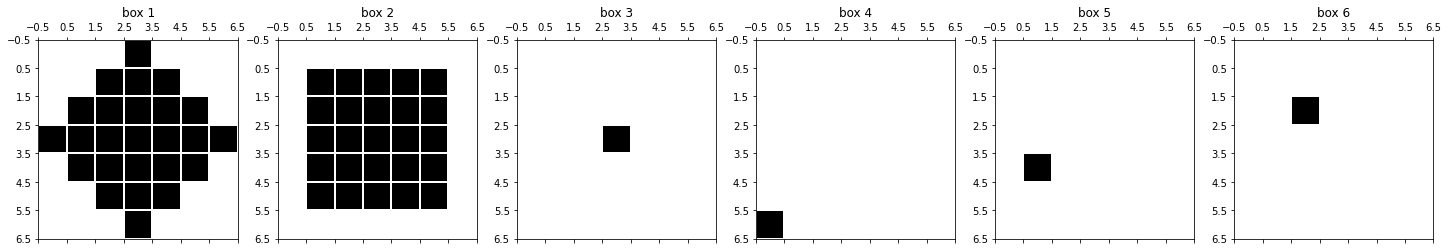

In [ ]:
#Problem 3b: Draw the boxes 
import matplotlib.pyplot as plt

box_list = [box1, box2, box3, box4, box5, ourownbox]
fig, axs = plt.subplots(1,6, figsize=(25,25))
j = 0
for i, testcase in enumerate(box_list):
    j = j+1
    axs[i].spy(testcase)
    axs[i].set_title(f"box {j}")
    axs[i].grid(color = 'w', linestyle = '-', linewidth = 2)
    axs[i].set_xticks(np.arange(-.5,7,1))
    axs[i].set_yticks(np.arange(-.5,7,1))

In [ ]:
# We need this to be a vector, hence here I reshape the boxes
box1 = box1.reshape(-1,1)
box2 = box2.reshape(-1,1)
box3 = box3.reshape(-1,1)
box4 = box4.reshape(-1,1)
box5 = box5.reshape(-1,1)
ourownbox = ourownbox.reshape(-1,1)

box1.shape


(49, 1)

In [ ]:
# HERE I BACKSOLVE FOR X TO FIND THE PRESSES, X IS THE VECTOR OF THE PRESSES
# Problem 3b continued Solving 
A = solve_A(7,7)

P1,L1,U1 = ppsolve(A)

P1b = bin_mul(P1, box1)
y_box1 = fsolve(L1,P1b)
x_box1 = rsolve(U1,y_box1)

P2,L2,U2 = ppsolve(A)
P2b = bin_mul(P2, box2)
y_box2 = fsolve(L2,P2b)
x_box2 = rsolve(U2,y_box2)

P3,L3,U3 = ppsolve(A)
P3b = bin_mul(P3, box3)
y_box3 = fsolve(L3,P3b)
x_box3 = rsolve(U3,y_box3)

P4,L4,U4 = ppsolve(A)
P4b = bin_mul(P4, box4)
y_box4 = fsolve(L4, P4b)
x_box4 = rsolve(U4, y_box4)

P5,L5,U5 = ppsolve(A)
P5b = bin_mul(P5, box5)
y_box5 = fsolve(L5, P5b)
x_box5 = rsolve(U5, y_box5)

P6,L6,U6 = ppsolve(A)
P6b = bin_mul(P6, ourownbox)
y_ourownbox = fsolve(L6,P6b)
x_ourownbox = rsolve(U6,y_ourownbox)



In [ ]:
x_box1.reshape(-1, 7)

array([[0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 0]], dtype=int8)

The pressed buttons have been:


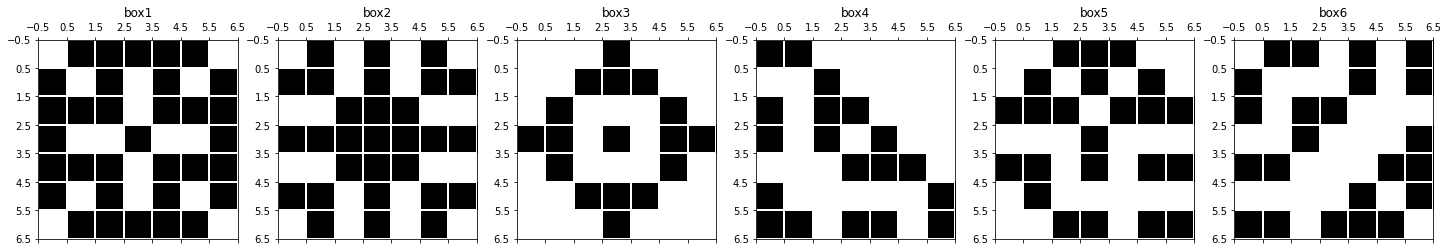

In [ ]:
x_box1 = x_box1.reshape(-1,7)
x_box2 = x_box2.reshape(-1,7)
x_box3 = x_box3.reshape(-1,7)
x_box4 = x_box4.reshape(-1,7)
x_box5 = x_box5.reshape(-1,7)
x_ourownbox = x_ourownbox.reshape(-1,7)


press_list = [x_box1, x_box2, x_box3, x_box4, x_box5, x_ourownbox]
fig, axs = plt.subplots(1,6, figsize=(25,25))

print("The pressed buttons have been:")

for i, testcase in enumerate(press_list):
    axs[i].spy(testcase)
    axs[i].set_title(f"box{i+1}")
    axs[i].grid(color = 'w', linestyle = '-', linewidth = 2)
    axs[i].set_xticks(np.arange(-.5,7,1))
    axs[i].set_yticks(np.arange(-.5,7,1))

## 3c 

In the exercise 3c, we are told from the prompt that the given 49 x 49 matrix A ( whose game grid is 7x7) is non-singular, i.e. it has full rank. Meaning that the 49 columns of A are linearly independent from each other. 

Additionally, in this particular game, it means that every combination of lights can be created by pressing buttons.

This is not always the case for any squared matrix mn x mn A (with game grid m x n). In the exercise we are told to try  for m in range 1 to 10 and n in range from 1 to 10.

### First code to sanity check. 

The diagonal of U from the LU factorization of A should have all 1 values.

A in the case of 49x49 has no 0 in the diagonal of U. Hence A has full rank and is non-singular. Let's see if this holds in my code:

In [ ]:
A = solve_A(7,7)
P,L,U = ppsolve(A)
d = np.diagonal(U)
print(d)

#How many times we have 1
independent_columns = np.count_nonzero( d == 1)
print("This matrix has", independent_columns, "independent columns" )
print("")

#How many times we have 0
dependent_columns = np.count_nonzero( d == 0)
print("As consequence this matrix has", dependent_columns, "linearly dependent columns")
print("")

rank = 7*7 - dependent_columns
print("The rank of the 49x49 is full because we know if from exercise, so the rank sould be m*n = 49 (where m=7 and n=7), and it is:", rank)
null_space = 7*7 - rank
print("")
print("The nullspace is this", null_space)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
This matrix has 49 independent columns

As consequence this matrix has 0 linearly dependent columns

The rank of the 49x49 is full because we know if from exercise, so the rank sould be m*n = 49 (where m=7 and n=7), and it is: 49

The nullspace is this 0


Given that the code above is correct, now I go ahead and code for the other cases.

[[0 1 0 0 1 0 0 1 0 0]
 [1 0 2 0 1 0 2 0 1 0]
 [0 2 0 0 3 0 0 2 0 0]
 [0 0 0 4 0 0 0 0 4 0]
 [1 1 3 0 2 0 4 1 1 0]
 [0 0 0 0 0 0 0 6 0 0]
 [0 2 0 0 4 0 0 2 0 0]
 [1 0 2 0 1 6 2 0 1 0]
 [0 1 0 4 1 0 0 1 8 0]
 [0 0 0 0 0 0 0 0 0 0]]


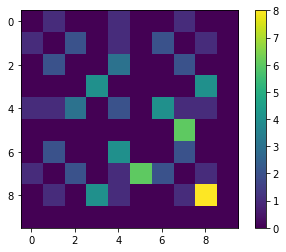

In [ ]:

f = []

for m in range(1,11):
    for n in range(1,11):
        A = solve_A(m,n)
        P,L,U = ppsolve(A)
        d = np.diagonal(U)
 
        #How many times we have 1
        independent_columns = np.count_nonzero( d == 1)
        #How many times we have 0
        dependent_columns = np.count_nonzero( d == 0)
        #How many independent elements
        number_of_columns = n*m
        rank = number_of_columns - dependent_columns 
        
        # We know that the rank is the number of linearly independent columns.
        # If there are dependent columns, the rank will me n - number of linearly dependent columns.
        # rank = independent_elements
        inputs_f = m*n - rank
        
        f.append(inputs_f)
        
f_array = np.asarray(f)
f_matrix = f_array.reshape(10,10)
print(f_matrix)
plt.imshow(f_matrix) #, cmap = 'YlOrRd')
plt.colorbar()
plt.show()

In [ ]:
 
A = solve_A(9,9)

P,L,U = ppsolve(A)

U

#find diagonal of U
d = np.diagonal(U)
d

# How many times we have 1, i.e. 
# linearly independent columns
np.count_nonzero( d == 1)

#How many times we have 0
# i.e. linearly dependent columns
nullspaces = np.count_nonzero( d == 0)
nullspaces

8

In [ ]:
n_list = np.linspace(1, 10, 10, dtype = np.int8)
m_list = np.linspace(1, 10, 10, dtype = np.int8)



for m in m_list:
    for n in n_list:
        A = solve_A(m,n)
        P,L,U = ppsolve(A)
        #print(U)

        #find diagonal of U
        d = np.diagonal(U)
        #print(d)

        #How many times we have 1
        independent_columns = np.count_nonzero( d == 1)
        #How many times we have 0
        dependent_columns = np.count_nonzero( d == 0)
        print("----------------------------")
        print("Matrix ", m*n,"x",m*n, ". Where m =", m, "and n=", n)
        print("For the matrix with dimension: ", m*n, "x", m*n, " the matrix has", dependent_columns, "linearly dependent columns")

        print(" ")
        # We know that the rank is the number of linearly independent columns.
        # If there are dependent columns, the rank will me n - number of linearly dependent columns.
        rank = m*n - dependent_columns
        print("Given that the rank is the number of linearly independent columns,")
        print("it means thath  the rank of A is number of columns - the number of linearly dependent columns, ")
        print("which is : ", rank )
        print(" ")
        null_space = m*n - rank
        print("For the matrix with dimension: ", m*n, "x", m*n, "  the f(m,n), i.e. nullspaces, is", null_space)
        print(" ")
        print(" ")
        print(" ")







 
 
 
----------------------------
Matrix  16 x 16 . Where m = 2 and n= 8
For the matrix with dimension:  16 x 16  the matrix has 0 linearly dependent columns
 
Given that the rank is the number of linearly independent columns,
it means thath  the rank of A is number of columns - the number of linearly dependent columns, 
which is :  16
 
For the matrix with dimension:  16 x 16   the f(m,n), i.e. nullspaces, is 0
 
 
 
----------------------------
Matrix  18 x 18 . Where m = 2 and n= 9
For the matrix with dimension:  18 x 18  the matrix has 1 linearly dependent columns
 
Given that the rank is the number of linearly independent columns,
it means thath  the rank of A is number of columns - the number of linearly dependent columns, 
which is :  17
 
For the matrix with dimension:  18 x 18   the f(m,n), i.e. nullspaces, is 1
 
 
 
----------------------------
Matrix  20 x 20 . Where m = 2 and n= 10
For the matrix with dimension:  20 x 20  the matrix has 0 linearly dependent columns
 
Give

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0d6e3b1-935d-45a3-9a1d-c6294c9bb153' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>